<a href="https://colab.research.google.com/github/sidkatiyar09/Applied-Machine-Learning/blob/main/Project_Credit_Card_fraud_Detection_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow

# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# import cv2

In [ ]:
ccdf=pd.read_csv('/content/drive/MyDrive/PYTHON-DEMO/projects_private/creditcard.csv')

In [ ]:
ccdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
x=ccdf.drop(columns=['Class','Time'],axis=1)
y=ccdf['Class']

In [ ]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
y

# scale features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#  Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)    # Shape: (n_samples, 29)



# reshaping csv file data from dim(shape(29,)) to (6,5,1) fro Conv2D

In [ ]:

# Pad to 30 features → reshape to (6, 5, 1)
X_padded = np.pad(X_scaled, ((0, 0), (0, 1)), mode='constant')  # → (n, 30)
X_reshaped = X_padded.reshape(-1, 6, 5, 1)                      # → (n, 6, 5, 1)

# split train test split

In [ ]:
# Split original dataset into train and test (80/20)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, stratify=y, random_state=42
)

# Split train into training and validation (e.g., 80/20 again)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42
)


In [ ]:
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,stratify=y,random_state=0)


# Deep network creation and execution


In [ ]:
from tensorflow.keras import layers
from tensorflow import keras

In [ ]:
# input1= layers.Input(shape=(29,))/
input1 = layers.Input(shape=(6, 5, 1))

In [ ]:
x=layers.Dense(units=512,activation='relu')(input1)

In [ ]:
x=layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',strides=(1,1))(x)
x=layers.MaxPooling2D(pool_size=(2,2))(x)
x=layers.BatchNormalization()(x)
x=layers.Dropout(0.20)(x)

In [ ]:
x=layers.Dense(units=256,activation='sigmoid')(x)
x=layers.BatchNormalization()(x)
x=layers.Dropout(0.20)(x)

In [ ]:
x=layers.Dense(units=256,activation='sigmoid')(x)
x=layers.BatchNormalization()(x)
x=layers.Dropout(0.20)(x)

In [ ]:
x=layers.Flatten()(x)
x=layers.Dense(units=128,activation='relu')(x)
x=layers.BatchNormalization()(x)
x=layers.Dropout(0.20)(x)

out=layers.Dense(units=1,activation='sigmoid')(x)

model = keras.Model(inputs=input1,outputs=out)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()]
            )

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6, 5, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6, 5, 512)      │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 6, 5, 32)       │       147,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 3, 2, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3, 2, 256)      │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 3, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3, 2, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       196,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,305 (1.61 MB)

 Trainable params: 420,961 (1.61 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [ ]:
history=model.fit(x=X_train,y=y_train,batch_size=512,epochs=10,validation_data=(X_val,y_val),verbose=1)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 320s 896ms/step - binary_accuracy: 0.6219 - loss: 0.6729 - val_binary_accuracy: 0.9992 - val_loss: 0.3731
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 319s 894ms/step - binary_accuracy: 0.8636 - loss: 0.4362 - val_binary_accuracy: 0.9993 - val_loss: 0.2459
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 321s 898ms/step - binary_accuracy: 0.9656 - loss: 0.2574 - val_binary_accuracy: 0.9993 - val_loss: 0.1218
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 317s 889ms/step - binary_accuracy: 0.9900 - loss: 0.1428 - val_binary_accuracy: 0.9992 - val_loss: 0.0643
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 317s 888ms/step - binary_accuracy: 0.9953 - loss: 0.0822 - val_binary_accuracy: 0.9993 - val_loss: 0.0380
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 317s 888ms/step - binary_accuracy: 0.9971 - loss: 0.0508 - val_binary_accuracy: 0.9993 - val_loss: 0.0250
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 316s 886ms/step - binary_accuracy: 0.9979 - loss: 0.0338 - val_binary_accuracy: 0.99

# training accuracy

In [ ]:
print("\n model training accuracy \n using binary_accuracy as metrics\n \n",history.history['binary_accuracy'])


 model training accuracy 
 using binary_accuracy as metrics
 
 [0.6867333054542542, 0.898582398891449, 0.9746373891830444, 0.9915896654129028, 0.9958689212799072, 0.9972843527793884, 0.9980030059814453, 0.9984967708587646, 0.9986448884010315, 0.9988643527030945]


# validation accuracy

In [ ]:
print("\n model validation accuracy \n using binary_accuracy as metrics\n \n",history.history['val_binary_accuracy'])


 model validation accuracy 
 using binary_accuracy as metrics
 
 [0.999210000038147, 0.9993197321891785, 0.9992538690567017, 0.9992319345474243, 0.9993197321891785, 0.9993416666984558, 0.9992977976799011, 0.9993197321891785, 0.9993416666984558, 0.9993416666984558]


# **predict**
  and

# **evaluate**  

In [ ]:
predict =model.predict(X_test)
loss, accuracy= model.evaluate(X_test,y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - binary_accuracy: 0.9993 - loss: 0.0083


In [ ]:
print("model.Evaluate  loss and accuracy ")
print("\n Accuracy =",accuracy)

print("\n Loss = ",loss)

model.Evaluate  loss and accuracy 

 Accuracy = 0.9992626905441284

 Loss =  0.00845449510961771


# saveing model

In [ ]:
model.save('/content/drive/MyDrive/PYTHON-DEMO/projects_private/creditcard_model.h5')


# plot accuracy vs val

#**calculating epochs**

In [ ]:
epochs=range(1,len(history.history['binary_accuracy'])+1)
# epochs=range(0,history.params['epochs'])

accuracy1=history.history['binary_accuracy']
val_accuracy=history.history['val_binary_accuracy']
loss1=history.history['loss']
val_loss=history.history['val_loss']

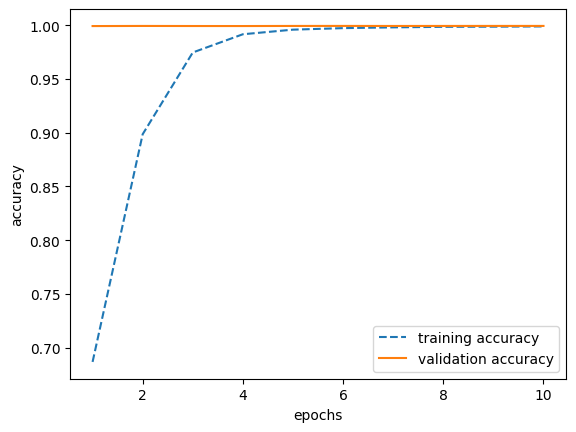

In [ ]:

plt.plot(epochs,accuracy,"--",label='training accuracy')
# plt.plot(epochs,val_accuracy,'*',label='validation accuracy')
plt.plot(epochs,val_accuracy,label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(epochs,binart)

#since model.evaluate() returns 2 values i.e loss and accuracy #**ploting evaluated accuracy is not possible**
using model.evaluate() method

In [ ]:
# epochs=range(1,len(history.history['loss'])+1)

In [ ]:
# plt.plot(epochs,loss)

In [ ]:
# x=layers.Dense

# **confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix as cmd

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay  as cmd

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
sns.reset_orig()

# **values greater than 0.05**

In [ ]:
y_pred= predict.round(8)>0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
label1=['non-fraud','fraud']
cmat=confusion_matrix(y_test,y_pred)

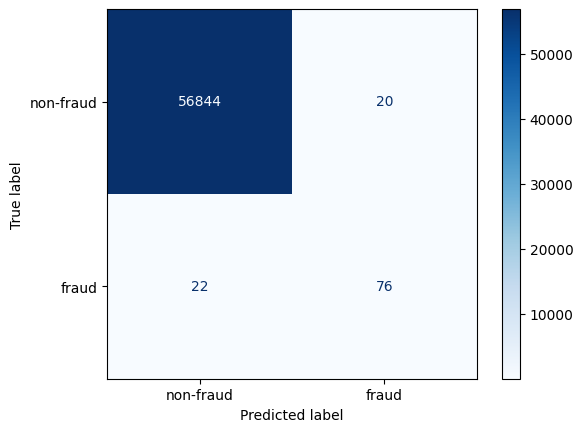

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(cmat,display_labels=label1).plot(cmap='Blues')


# # Compute the confusion matrix
# cmat = confusion_matrix(y_test, y_pred)

# # Display the confusion matrix
# ConfusionMatrixDisplay(confusion_matrix=cmat, display_labels=['Not Fraud', 'Fraud']).plot(cmap='Blues')


In [ ]:
# # cmd.from_predictions(y_test,y_pred,display_labels=label1,cmap='berlin',colorbar=True)
# # Update cell text to bold and black
# # for text_obj in cmd.ax_.texts:
# #     text_obj.set_fontweight('bold')
# #     text_obj.set_color('black')

# # plt.show()
# text_obj.set_fontsize(12)
# text_obj.set_family('monospace')  # or 'sans-serif'


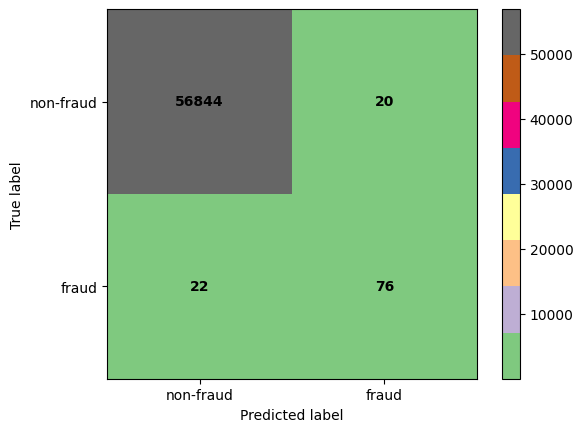

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix display and store the object
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=label1,         # e.g. ['Not Fraud', 'Fraud']
    cmap='Accent',                  # 'berlin' is not valid; use a valid matplotlib colormap
    colorbar=True
)

# Update each text object in the confusion matrix to be bold and black
for text_obj in disp.ax_.texts:
    text_obj.set_fontweight('bold')
    text_obj.set_color('black')

plt.show()


# **non fraud %**
# **true positive**
## actual legitinmate transactions %

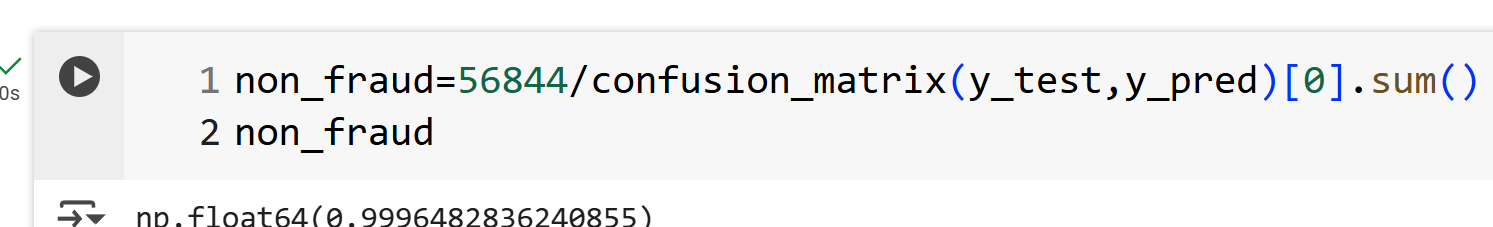

In [ ]:
#true +ve
non_fraud=56844/confusion_matrix(y_test,y_pred)[0].sum()
true_positive=non_fraud
true_positive

np.float64(0.9996482836240855)

In [ ]:
print(classification_report(y_test,y_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.79      0.78      0.78        98
           0       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962

